In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
uploaded = files.upload()

Saving temp.csv to temp.csv


In [3]:
df = pd.read_csv("temp.csv")

In [4]:
df.head()

,Date,Temp
0,1981/01/01,20.7
1,1981/01/02,17.9
2,1981/01/03,18.8
3,1981/01/04,14.6
4,1981/01/05,15.8


In [6]:
df.set_index(["Date"], inplace = True) # 시계열이라 인덱스부터 설정
df.head()

,Temp
Date,
1981/01/01,20.7
1981/01/02,17.9
1981/01/03,18.8
1981/01/04,14.6
1981/01/05,15.8


In [7]:
df.isnull().sum()

,0
Temp,0


<Axes: xlabel='Date'>

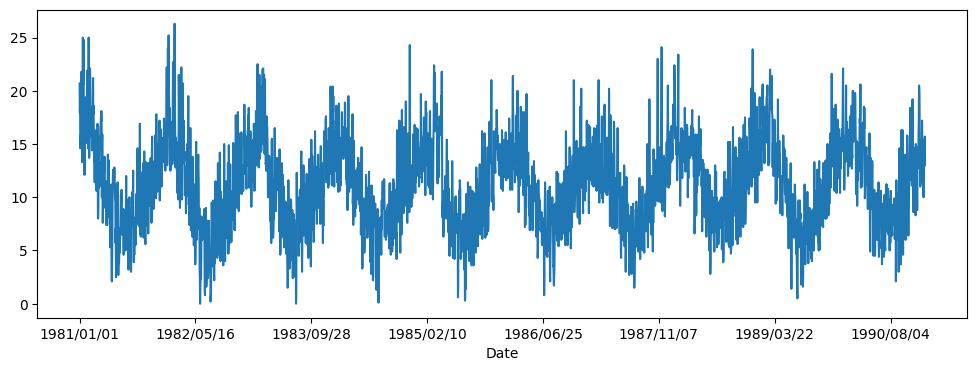

In [9]:
plt.figure(figsize = (12, 4))
df["Temp"].plot() # up & down 이 있다. seasonality 존재

In [10]:
# autocorrelation plot
from pandas.plotting import lag_plot, autocorrelation_plot

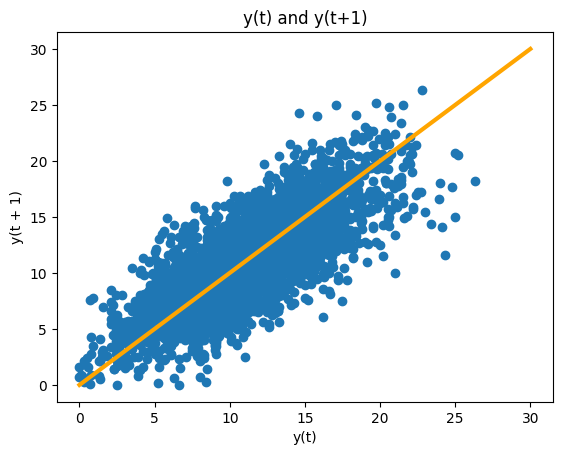

In [12]:
lag_plot(df["Temp"]) # positive한 영향. 우상향함.
plt.title("y(t) and y(t+1)")
plt.plot([0, 30], [0, 30], c = "orange", linewidth = 3) # 0, 30 0, 30 직선 그래프

In [13]:
df["lag_1"] = df["Temp"].shift(1) # lag를 보자. 어제가 오늘에 영향을 미치는지

In [14]:
df.head()

,Temp,lag_1
Date,,
1981/01/01,20.7,NaN
1981/01/02,17.9,20.7
1981/01/03,18.8,17.9
1981/01/04,14.6,18.8
1981/01/05,15.8,14.6


In [15]:
df.corr() # lag1과 temp 상관관계가 0.77로 높게 나옴

,Temp,lag_1
Temp,1.00000,0.77487
lag_1,0.77487,1.00000


<Axes: >

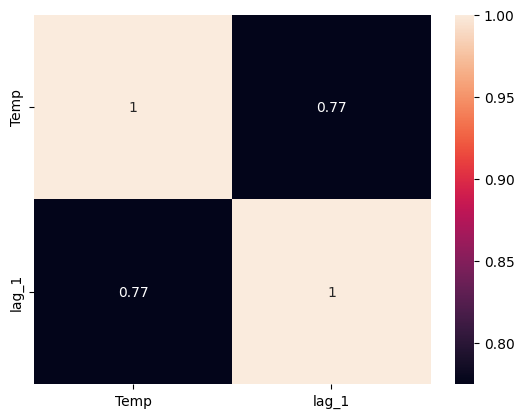

In [16]:
sns.heatmap(df.corr(), annot = True)

# Auto correlation plot


- X 축 : lag number
- Y 축 : correlation coefficient located (-1, 1)

- 점선 : 95% 신뢰구간
- 실선 : 99% 신뢰구간

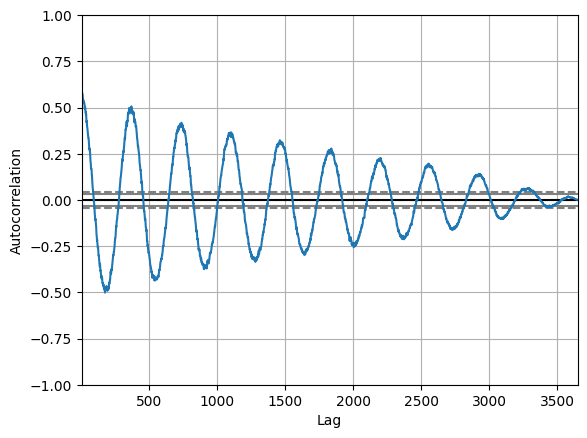

In [17]:
autocorrelation_plot(df["Temp"])
plt.show() # 3500 정도 지나가면 영향을 거의 미치지 않음.

- 이 그래프는 주기적 변동이 관찰됨
- 일정한 lag 간격에서 파형처럼 반복적인 패턴이 나타나는 것을 확인
- 주기성을 가지고 있음을 의미(seasonality)
   - 날씨 데이터이므로, 계절적 요인에 의해 주기적으로 온도가 오르락 내리락 하고 있음을 알 수 있음

- lag가 증가할 수 록 자기 상관계수가 감소하는 모습을 보임
  - 다만, 시간이 지남에 따라 데이터의 자기 상관이 약해지는 패턴이 또한 관찰

- 점선으로 표시된 부분은 통계적으로 유의미한 상관관계의 임계값임
- 이 범위를 벗어나는 값은 통계적으로 유의미한 자기 상관을 가진다고 볼 수 있다

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

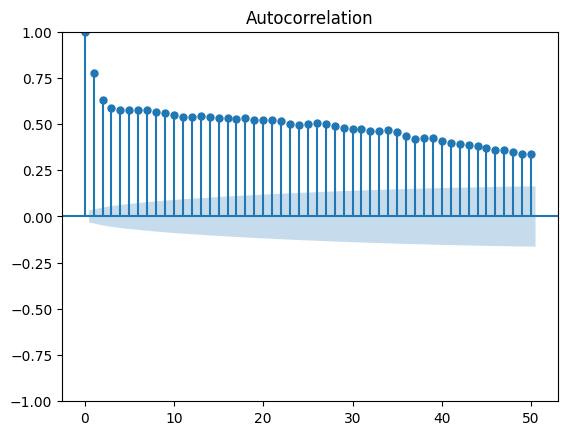

In [21]:
plot_acf(df["Temp"], lags = 50)
plt.show() # 내려간다. shade는 신뢰구간. autocorr를 50구간만 본거다. = 영향이 갈수록 줄어든다.

- X축 : 시간 lag
   - lag가 커질 수록 과거와의 시차가 증가함을 의미

- Y축 : autocorrelation
   - 자기상관계수 located between ,$[-1, 1]$

   - 값이 1에 가까울 수록 양의 상관관계가 강하며, -1에 가까울 수록 음의 상관관계가 강함
   - 값이 0이면 상관관계가 없다

- 첫번째 lag에서 1에 가까운 자기 상관을 가지며, 이후 lag가 증가할 수록 자기 상관계수가 점진적으로 감

- 시계열 데이터가 시간이 지남에 따라 점차 이전 값과의 상관성이 약해지는 감소 패턴이 관찰

- 파란 음영
  - 통계적으로 유의미한 상관관계의 범위
  - 이 범위를 벗어나면 상관관계가 통계적으로 유의미함을 의미
  - 대부분 lag가 파란 음영을 벗어나고 있어서, 일정 수준의 자기 상관이 존재한다고 판단
- 추세적 감소
   - 자기 상관계수가 lag가 커질수록 서서히 감소하는 모습을 보임

In [ ]:
# forecasting-- for fun

In [22]:
from statsmodels.tsa.ar_model import AutoReg

In [30]:
train_size = int(len(df) * 0.8) # length의 80%로 보겠다. 인티저 형변환
#train_set, test_set = df[:train_size], df[train_set:]

왜 이렇게 하냐
시계열 데이터의 경우, 훈련 세트와 테스트 세트를 나누는 방식은 일반적인 데이터셋 분할과는 조금 다를 수 있습니다. 시계열 데이터에서는 시간의 순서가 중요한 특성이기 때문에, 훈련 데이터와 테스트 데이터에 중복되는 데이터가 없어야 합니다. 즉, 훈련 세트와 테스트 세트는 시간적으로 분리되어야 합니다.

그니까 **시간적으로 겹치지 않으면**됨

In [31]:
train_set, test_set = df[:train_size], df[train_size:] # 지금 트레인 데이터 테스트 데이터가 따로 있는게 아니라 df하나라서 트레인한 데이터는 80정도로 할당하고 나머지는 테스트로 쓸거라서 이렇게 함

In [32]:
model = AutoReg(train_set["Temp"], lags = 1).fit()
predictions = model.predict(start= len(train_set), end = len(df)-1, dynamic = False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the po

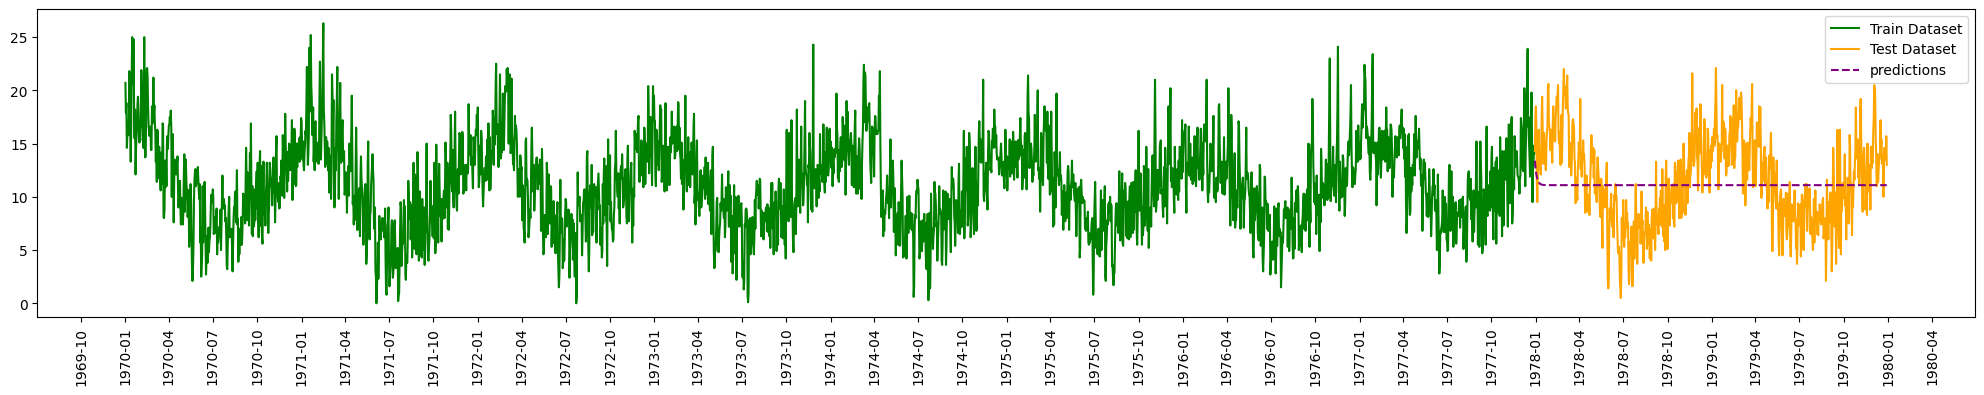

In [33]:
import matplotlib.dates as mdates
plt.figure(figsize = (25, 4))
plt.plot(train_set.index, train_set["Temp"], label = "Train Dataset", c = "green")
plt.plot(test_set.index, test_set["Temp"], label = "Test Dataset", c = "orange")
# prediction
plt.plot(test_set.index, predictions , label = "predictions", c = "purple", linestyle = "--") # 결국에는 위아래 up&down이 상쇄돼서
# 얘를 기점으로 얼마나 올라가고 내려갈 것인지 까지가 forecasting이다.
plt.xticks(rotation = 90)
# 그래프 ticks를 겹치지 않게 설정
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.legend()
plt.show()

In [34]:
 from pandas_datareader.data import DataReader
 import yfinance as yf # yahoo finance

In [35]:
from datetime import datetime

In [59]:
firm_list = ["AAPL", "GOOG", "AMZN", "NFLX"] # 티커로 써야함
firm_name = ["apple", "google", "amazon", "netflix"]

end = datetime.now()

start = datetime(end.year - 1, end.month, end.day) # 작년

for stock in firm_list :
  globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, AMZN, NFLX]
company_name = ["apple", "google", "amazon", "netflix"]

for company, com_name in zip(company_list, company_name): # zip 세트로 짝지어서 그니까 튜플 리스트와 네
  company["company_name"] = com_name

df = pd.concat(company_list, axis = 0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [40]:
df.head()

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2023-11-27 00:00:00+00:00  188.864731  189.789993  190.669998  188.899994   
2023-11-28 00:00:00+00:00  189.471756  190.399994  191.080002  189.399994   
2023-11-29 00:00:00+00:00  188.446793  189.369995  192.089996  188.970001   
2023-11-30 00:00:00+00:00  189.023956  189.949997  190.320007  188.190002   
2023-12-01 00:00:00+00:00  190.307693  191.240005  191.559998  189.229996   

Price                            Open      Volume company_name Adj Close  \
Ticker                           AAPL        AAPL                   GOOG   
Date                                                                       
2023-11-27 00:00:00+00:00  189.919998  40552600.0        apple       NaN   
2023-11-28 00:00:00+00:00  189.779999  38415400.0        apple       NaN   
2023-11-29 00:00:00+00:00  190.899994  43014200.0        apple       NaN   
2023-11-30 00:00:00+00:00  189.839996  48794400.0        apple       NaN   
2023-12-01 00:00:00+00:00  190.330002  45679300.0        apple       NaN   

Price                     Close High  ...       Low Open Volume Adj Close  \
Ticker                     GOOG GOOG  ... AMZN AMZN AMZN   AMZN      NFLX   
Date                                  ...                                   
2023-11-27 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-11-28 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-11-29 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-11-30 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-12-01 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   

Price                     Close High  Low Open Volume  
Ticker                     NFLX NFLX NFLX NFLX   NFLX  
Date                                                   
2023-11-27 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-11-28 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-11-29 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-11-30 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-12-01 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  

[5 rows x 25 columns]

`for company, com_name in zip(company_list, company_name):`

- zip() 함수는 두 리스트 company_list, company_name의 요소를 묶어 병렬적으로 처리할 수 있음 AAPL - apple 이렇게 묶는다고

In [41]:
AAPL

Price,Adj Close,Close,High,Low,Open,Volume,company_name
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2023-11-27 00:00:00+00:00,188.864731,189.789993,190.669998,188.899994,189.919998,40552600,apple
2023-11-28 00:00:00+00:00,189.471756,190.399994,191.080002,189.399994,189.779999,38415400,apple
2023-11-29 00:00:00+00:00,188.446793,189.369995,192.089996,188.970001,190.899994,43014200,apple
2023-11-30 00:00:00+00:00,189.023956,189.949997,190.320007,188.190002,189.839996,48794400,apple
2023-12-01 00:00:00+00:00,190.307693,191.240005,191.559998,189.229996,190.330002,45679300,apple
...,...,...,...,...,...,...,...
2024-11-18 00:00:00+00:00,228.020004,228.020004,229.740005,225.169998,225.250000,44686000,apple
2024-11-19 00:00:00+00:00,228.279999,228.279999,230.160004,226.660004,226.979996,36211800,apple


In [42]:
GOOG

Price,Adj Close,Close,High,Low,Open,Volume,company_name
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,
Date,,,,,,,
2023-11-27 00:00:00+00:00,137.711807,138.050003,139.630005,137.539993,137.570007,17886400,google
2023-11-28 00:00:00+00:00,138.280411,138.619995,138.660004,137.039993,137.630005,17046900,google
2023-11-29 00:00:00+00:00,136.065842,136.399994,139.669998,136.294998,138.985001,21014700,google
2023-11-30 00:00:00+00:00,133.591919,133.919998,136.960007,132.789993,136.399994,29913500,google
2023-12-01 00:00:00+00:00,132.993408,133.320007,133.500000,132.151993,133.320007,24258400,google
...,...,...,...,...,...,...,...
2024-11-18 00:00:00+00:00,176.800003,176.800003,176.910004,174.419998,174.955002,18725400,google
2024-11-19 00:00:00+00:00,179.580002,179.580002,180.169998,175.115997,175.235001,15392900,google


In [43]:
NFLX

Price,Adj Close,Close,High,Low,Open,Volume,company_name
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX,NFLX,
Date,,,,,,,
2023-11-27 00:00:00+00:00,479.170013,479.170013,482.000000,475.350006,479.029999,3625900,netflix
2023-11-28 00:00:00+00:00,479.000000,479.000000,480.500000,475.950012,478.109985,2890200,netflix
2023-11-29 00:00:00+00:00,477.190002,477.190002,480.989990,474.489990,479.000000,2855500,netflix
2023-11-30 00:00:00+00:00,473.970001,473.970001,478.589996,470.420013,475.309998,4287300,netflix
2023-12-01 00:00:00+00:00,465.739990,465.739990,475.230011,464.600006,473.170013,4338100,netflix
...,...,...,...,...,...,...,...
2024-11-18 00:00:00+00:00,847.049988,847.049988,848.450012,809.330017,815.500000,4084100,netflix
2024-11-19 00:00:00+00:00,871.320007,871.320007,874.489990,839.159973,839.750000,3814200,netflix


In [45]:
AMZN.describe() # 251 쉬는날빼고 휴장. 종가 중에 adj close max min 값들 종가를 많이 봄

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,177.613626,177.613626,179.378725,175.662630,177.623705,4.209370e+07
std,15.348861,15.348861,15.579868,15.202699,15.531021,1.651758e+07
min,144.520004,144.520004,145.350006,142.809998,143.550003,2.164740e+07
25%,170.419998,170.419998,171.320000,167.989998,169.664993,3.140295e+07
50%,180.110001,180.110001,182.389999,178.649994,180.389999,3.855430e+07
75%,186.885002,186.885002,188.720001,185.279999,187.135002,4.678975e+07
max,214.100006,214.100006,215.899994,210.880005,214.160004,1.414484e+08


In [47]:
AAPL.info() # adjust이상한거 조정한거 스무드시킨거. 암튼 실수 또는 정수로 이루어짐

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-11-27 00:00:00+00:00 to 2024-11-22 00:00:00+00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  251 non-null    float64
 1   (Close, AAPL)      251 non-null    float64
 2   (High, AAPL)       251 non-null    float64
 3   (Low, AAPL)        251 non-null    float64
 4   (Open, AAPL)       251 non-null    float64
 5   (Volume, AAPL)     251 non-null    int64  
 6   (company_name, )   251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [48]:
import matplotlib.pyplot as plt

<Axes: xlabel='Date'>

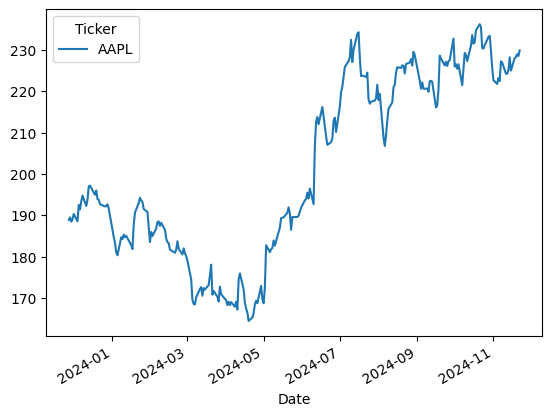

In [49]:
AAPL["Adj Close"].plot()

<Axes: xlabel='Date'>

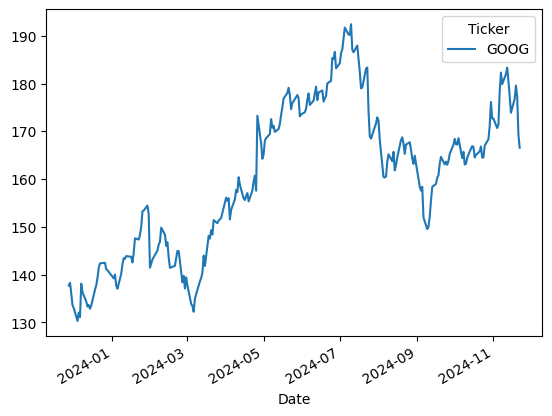

In [50]:
GOOG["Adj Close"].plot()

<Axes: xlabel='Date'>

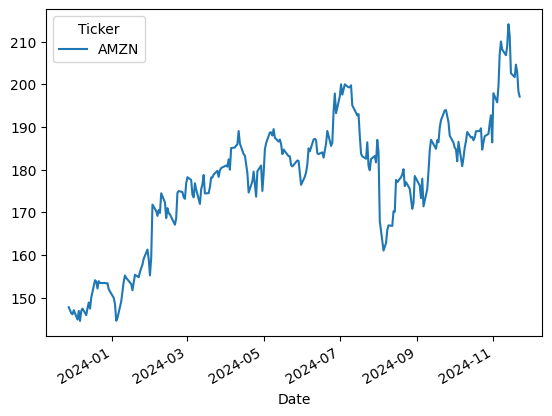

In [51]:
AMZN["Adj Close"].plot()

# 더 잘 그려보자

In [52]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

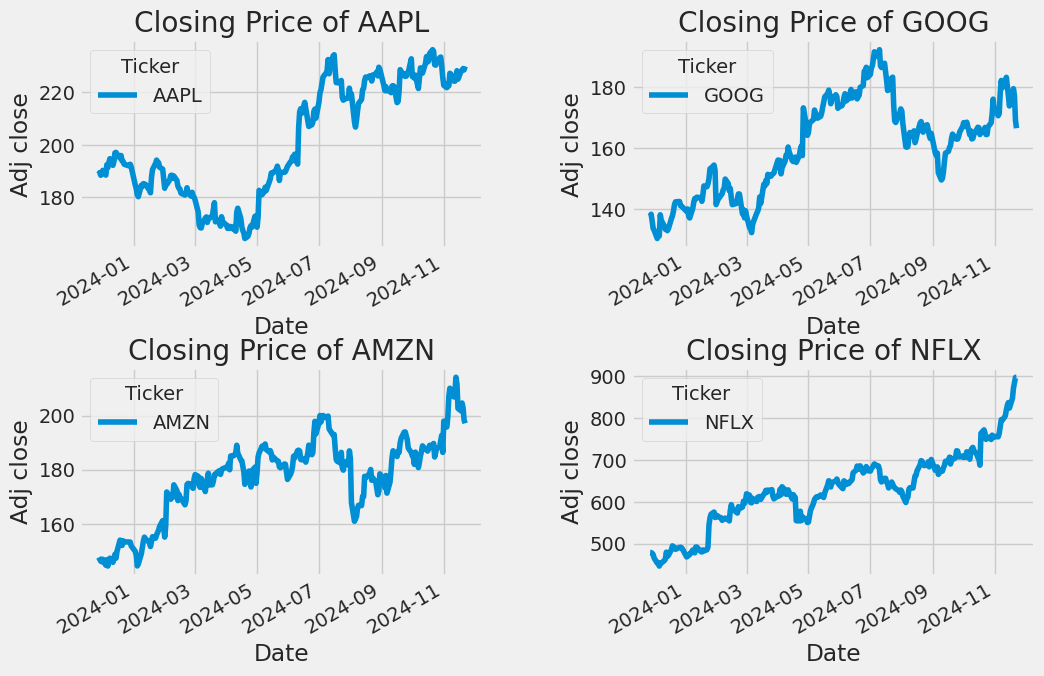

In [53]:
# 따로 보니까 not really professional - 병렬
fig, axes = plt.subplots(2, 2, figsize = (12, 8))
fig.tight_layout(pad = 5.0) # 패딩. 서브플롯의 간격 조정

for i, (company, ax) in enumerate(zip(company_list, axes.flatten()), 1):
  company["Adj Close"].plot(ax = ax)
  ax.set_ylabel("Adj close")
  ax.set_title(f"Closing Price of {firm_list[i - 1]}")

plt.show() # financial times 그래프 같

```
company_list = ["com1", "com2", "com3", "com4"]
axes = [[ax1. ax2], [ax3, ax4]]

axes.flatten()
> [ax1, ax2, ax3, ax4] #1열로 병렬 시켰다.
```

```
zip(company_list, axes.flatten())
> [("com1", ax1), ("com2", ax2), ("com3, ax3), ("com4", ax4)]
```

```
enumerate
```
- 이 함수는 이터러블(돌아가는거)의 각 요소에 인덱스 번호를 **추가**함
- 두번째 인자인 1의 인덱스 시작값을 설정
- 기본값은 0이지만, 여기서는 1로 설정하여 인덱스가 1부터 시작함

```
zipped = [("com1", ax1), ("com2", ax2), ("com3, ax3), ("com4", ax4)]

enumerate(zipped, 1)
> [(1, ("com1", ax1)), (2, ("com2", ax2)), (3, ("com3", ax3)), (4, ("com4", ax4))]
```

```
for i, (company, ax) in enumerate(zip(company_list, axes.flatten()), 1)
# enumerate 로 생성된 인덱스(1부터 시작)와 데이터를 분해
# (company, ax) 는 zip으로 묶인 각 회사 데이터와 서브플롯 객체의 튜플을 분해

#동작 : 첫 번째 반복
i = 1
company = "com1"
ax = ax1

#second iteration
i = 2
company = "com2"
ax = ax2
```

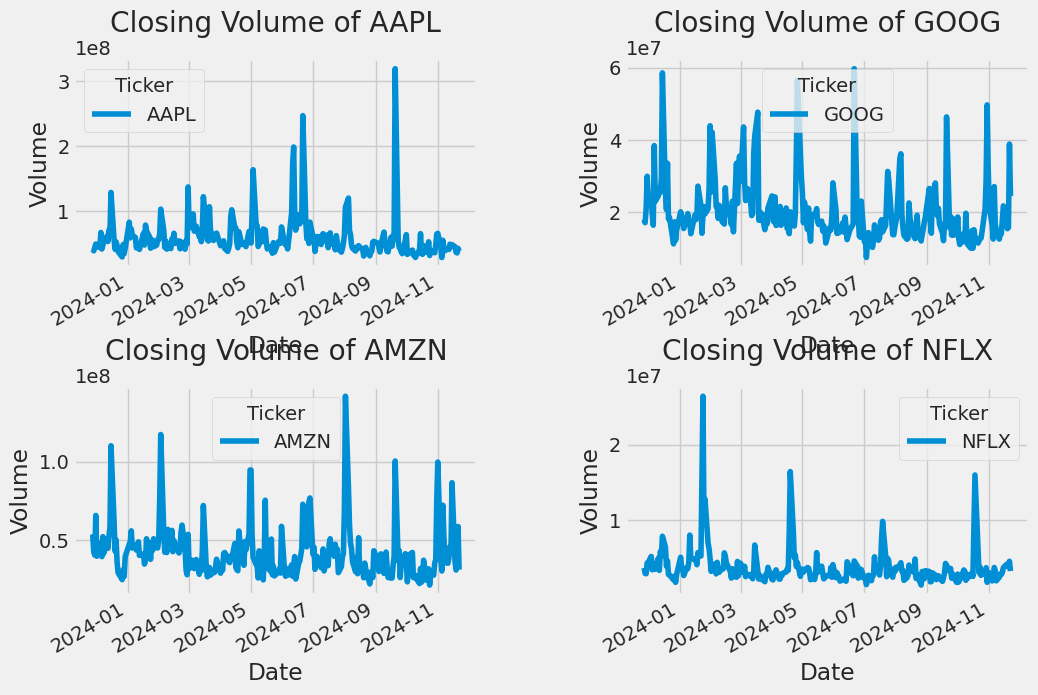

In [55]:
# volume
fig, axes = plt.subplots(2, 2, figsize = (12, 8))
fig.tight_layout(pad = 5.0) # 패딩. 서브플롯의 간격 조정

for i, (company, ax) in enumerate(zip(company_list, axes.flatten()), 1):
  company["Volume"].plot(ax = ax)
  ax.set_ylabel("Volume")
  ax.set_title(f"Closing Volume of {firm_list[i - 1]}")

plt.show()

```
firm_list = ["AAPL", "GOOG", "AMZN", "NFLX"] # 티커로 써야함
firm_name = ["apple", "google", "amazon", "netflix"]

end = datetime.now()

start = datetime(end.year - 1, end.month, end.day) # 작년

for stock in firm_list :
  globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, AMZN, NFLX]
company_name = ["apple", "google", "amazon", "netflix"]

for company, com_name in zip(company_list, company_name): # zip 세트로 짝지어서 그니까 튜플 리스트와 네
  company["company_name"] = com_name

df = pd.concat(company_list, axis = 0)
```
이 셀 다시 실행시키고 해야 다 나옴

<Axes: xlabel='Date'>

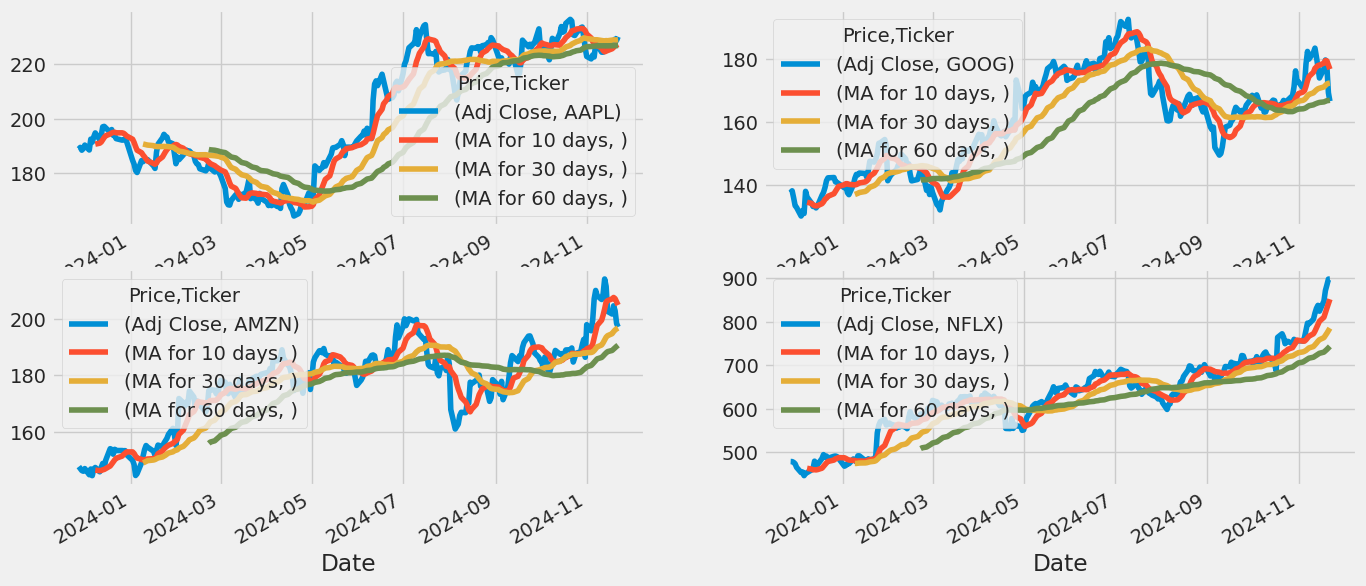

In [60]:
moving_day = [10, 30, 60]

for ma in moving_day:
  for company in company_list:
    column_name = f"MA for {ma} days"
    company[column_name] = company["Adj Close"].rolling(window = ma).mean()

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 7))

AAPL.plot(y = ["Adj Close", "MA for 10 days", "MA for 30 days", "MA for 60 days"],
          ax = axes[0, 0])
GOOG.plot(y = ["Adj Close", "MA for 10 days", "MA for 30 days", "MA for 60 days"],
          ax = axes[0, 1])

AMZN.plot(y = ["Adj Close", "MA for 10 days", "MA for 30 days", "MA for 60 days"],
          ax = axes[1, 0])

NFLX.plot(y = ["Adj Close", "MA for 10 days", "MA for 30 days", "MA for 60 days"],
          ax = axes[1, 1])